In [80]:
from tifffile import TiffFile
import matplotlib.pyplot as plt
import cv2
image_id = 20

In [81]:
# image = TiffFile('../train_dataset_dataset/video0/frames_ms/0000.tif')
image = cv2.imread(f"../train_dataset_dataset/video0/frames_rgb/{image_id:04}.png")

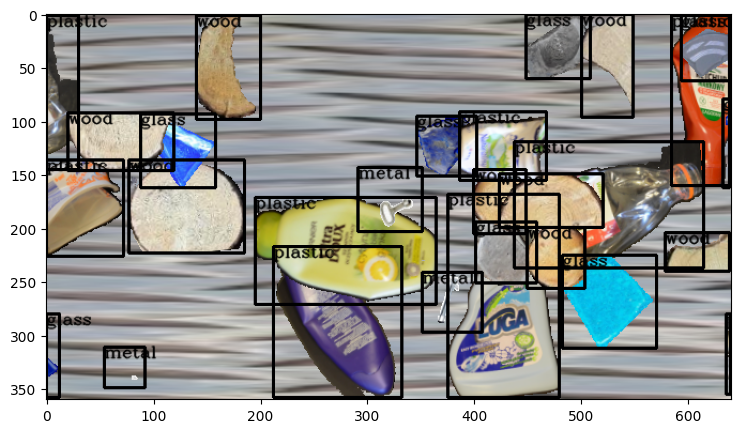

In [82]:
import json

with open("../dataset/video0.json") as f:
    data = json.load(f)
annotations = [a for a in data["annotations"] if a["image_id"] == f"video0_{image_id}"]
pages = []

page = image
pages.append(page)

classes = "wood, glass, plastic, metal".split(", ")

for a in annotations:
    x, y, w, h = list(map(int, a["bbox"]))
    cv2.rectangle(page, (x, y), (x+w, y+h), 1, 2)
    cv2.putText(page, classes[a["category_id"]], org=(x, y+10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5, color=0.5, thickness=1, lineType=cv2.LINE_AA, bottomLeftOrigin=False)

        
plt.figure(0, (10,5))
plt.imshow(page[...,::-1])